In [1]:
%run my_imports.py

# Figure on jupyter notebook
%matplotlib inline

# Automatically reload modules
%load_ext autoreload
%autoreload 2

In [2]:
folder_selected = r'D:\results\Results_ANS\subjectFolderExperiment'
epoch_bandpower_list = loading_from_listfolder(folder_selected,'epoch_bandpower')
folderGA = os.path.join(folder_selected,'GA')

if not os.path.exists(folderGA):
    os.makedirs(folderGA)
    print('**** Create Grand Average folder ****')
else:
    print('**** Grand Average folder exists already ****')

D:\results\Results_ANS\subjectFolderExperiment\s0
D:\results\Results_ANS\subjectFolderExperiment\s01
D:\results\Results_ANS\subjectFolderExperiment\s02
D:\results\Results_ANS\subjectFolderExperiment\s03
D:\results\Results_ANS\subjectFolderExperiment\s04
D:\results\Results_ANS\subjectFolderExperiment\s05
D:\results\Results_ANS\subjectFolderExperiment\s06
D:\results\Results_ANS\subjectFolderExperiment\s07
D:\results\Results_ANS\subjectFolderExperiment\s08
D:\results\Results_ANS\subjectFolderExperiment\s09
D:\results\Results_ANS\subjectFolderExperiment\s10
D:\results\Results_ANS\subjectFolderExperiment\s11
D:\results\Results_ANS\subjectFolderExperiment\s12
D:\results\Results_ANS\subjectFolderExperiment\s13
D:\results\Results_ANS\subjectFolderExperiment\s14
D:\results\Results_ANS\subjectFolderExperiment\s15
D:\results\Results_ANS\subjectFolderExperiment\s16
D:\results\Results_ANS\subjectFolderExperiment\s17
D:\results\Results_ANS\subjectFolderExperiment\s18
D:\results\Results_ANS\subjectFo

In [4]:
epochs_breathing_phase = loading_from_listfolder(folder_selected,'av_breathing_phase_dict')

D:\results\Results_ANS\subjectFolderExperiment\s0
D:\results\Results_ANS\subjectFolderExperiment\s01
D:\results\Results_ANS\subjectFolderExperiment\s02
D:\results\Results_ANS\subjectFolderExperiment\s03
D:\results\Results_ANS\subjectFolderExperiment\s04
D:\results\Results_ANS\subjectFolderExperiment\s05
D:\results\Results_ANS\subjectFolderExperiment\s06
D:\results\Results_ANS\subjectFolderExperiment\s07
D:\results\Results_ANS\subjectFolderExperiment\s08
D:\results\Results_ANS\subjectFolderExperiment\s09
D:\results\Results_ANS\subjectFolderExperiment\s10
D:\results\Results_ANS\subjectFolderExperiment\s11
D:\results\Results_ANS\subjectFolderExperiment\s12
D:\results\Results_ANS\subjectFolderExperiment\s13
D:\results\Results_ANS\subjectFolderExperiment\s14
D:\results\Results_ANS\subjectFolderExperiment\s15
D:\results\Results_ANS\subjectFolderExperiment\s16
D:\results\Results_ANS\subjectFolderExperiment\s17
D:\results\Results_ANS\subjectFolderExperiment\s18
D:\results\Results_ANS\subjectFo

In [5]:
dict_subject_phase ={}
for k in epochs_breathing_phase[0].keys():
    dict_subject_phase[k] = tuple(d[k] for d in epochs_breathing_phase)

print(dict_subject_phase)

{'HOLD': (-6.225584179341462, 5.850188235333129, 11.62199205407134, 24.93395586144777, 8.621277422488907, -3.2856538453559385, 6.824255954638209, -6.242925869626496, 23.49619644109061, 12.376246456475462, 1.9331547900189012, -8.197392422319867, 5.080328377781151, -14.453045518552994, -5.655875611078136, 21.921662688342845, -5.3097009991263775, 6.455629728067544, -2.4568330633088924, 22.61020889092433, 3.381159826072431, 13.906000657793875, -10.761692533981348, 7.029117395124099, 5.94392578044393, -3.968279276391949, 7.786291944987813, 11.6198958864546, -2.423989663555817, 11.716813028420793, -13.181252238986927, 0.12462058467405251, -0.636639811450583, -0.43992283704034224), 'MI_START': (18.450646443391047, 13.88821782312366, -7.486658688404143, 18.23707092803878, 3.049297806423128, -5.139402900343229, 8.665532883764158, 6.878771294576614, 39.62477172594579, 10.874676217167027, 0.2974215763577173, 35.80792022965122, -14.895523338265797, 9.593185833092297, 3.3468809458252005, 21.2478655

In [6]:
df_phase = pd.DataFrame.from_dict(dict_subject_phase)
df_phase.head()

HOLD   MI_START
0  -6.225584  18.450646
1   5.850188  13.888218
2  11.621992  -7.486659
3  24.933956  18.237071
4   8.621277   3.049298

# Decoding Results

In [83]:
folderResults = r'D:\results\Results_ANS\Decoding_MI_START_STOP_all_nested\GA'
acc_onoff = loadmat(os.path.join(folderResults,'DataAccuracy_on_off.mat'))
acc_onoff = acc_onoff['DataAccuracy']['mu'][0][0]
acc_onset = acc_onoff[:-1,0]
np.shape(acc_offset)

(34,)

# Averaged band power


In [84]:
import seaborn as sns
import pandas as pd
from utils.utils_normalization import zscore_over_trials

baseline_event = {'MI_START':(-2,0)}

iplot = 0
df_events = dict()

timeInterval_event = {'MI_START':[1,3]}
df_list = []
for iSubject,epoch_subject in enumerate(epoch_bandpower_list):
    b = "Subject: " + str(iSubject) + '/'+ str(len(epoch_bandpower_list)-1)
    print (b, end="\r")
    df = pd.DataFrame()
    for iBand,band_name in enumerate(epoch_subject.keys()):
        for iEvent,event_type in enumerate(timeInterval_event.keys()):
            index_1 = np.where(epoch_subject[band_name].times == timeInterval_event[event_type][0])[0][0]
            index_2 = np.where(epoch_subject[band_name].times == timeInterval_event[event_type][1])[0][0]
 
            # baseline + bandpower
            data_mu = epoch_subject[band_name][event_type]._data
            data_mu = np.mean(data_mu, axis=1)
            data_mu = zscore_over_trials(data_mu)
            data_mu = mne.baseline.rescale(data_mu, epoch_subject[band_name][event_type].times, 
                                            baseline=baseline_event[event_type])
            data_mu = data_mu[:,index_1:index_2+1]
            event_band_type = band_name + "_" + event_type
            df[event_band_type] = np.mean(data_mu,axis=1)
            
            df['Subject'] = iSubject*np.ones((np.shape(data_mu)[0]))
        
    df_list.append(df)
        

In [85]:
df_GA = pd.concat(df_list)
df_mean_GA = df_GA.groupby('Subject').mean().reset_index()

In [86]:
# df_mean_GA = df_mean_GA.drop([11],axis=0)
df_mean_GA.head()

Subject  Mu_MI_START  Beta_MI_START
0      0.0     0.208126       0.140581
1      1.0    -0.195319      -0.220139
2      2.0    -0.472306      -0.376431
3      3.0     0.226703      -0.184461
4      4.0     0.040590      -0.246124

# Correlation between Breathing phase and BCI accuracies

In [87]:
data_frame_array = df_phase.to_numpy()
diff_on = data_frame_array[:,1]+180
print(diff_on)

[198.45064644 193.88821782 172.51334131 198.23707093 183.04929781
 174.8605971  188.66553288 186.87877129 219.62477173 190.87467622
 180.29742158 215.80792023 165.10447666 189.59318583 183.34688095
 201.2478655  164.03639703 188.35046458 166.00374644 201.51052116
 182.96761592 186.02399586 156.59251269 168.34669756 173.0854158
 169.92617995 186.72796862 194.11624837 171.48189043 171.40613982
 173.43647371 206.86287253 181.64704345 188.82808086]


In [88]:
# First quartile (Q1) 
Q1 = np.percentile(diff_on, 25, interpolation = 'midpoint') 
  
# Third quartile (Q3) 
Q3 = np.percentile(diff_on, 75, interpolation = 'midpoint') 
  
# Interquaritle range (IQR) 
IQR = Q3 - Q1 
outliers_index = np.where(diff_on<Q1-1.5*IQR) or np.where(diff_on>Q3+1.5*IQR)
print(outliers_index)

diff_on_new = [diff_on[i] for i, x in enumerate(diff_on) if i not in outliers_index]
acc_onset_new = [acc_onset[i] for i, x in enumerate(acc_onset) if i not in outliers_index]

(array([], dtype=int64),)


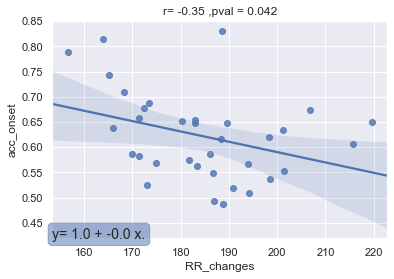

In [89]:
import seaborn as sns; 
import scipy
from scipy.stats import linregress
sns.set(color_codes=True)

X = diff_on
y = acc_onset
slope, intercept, r_value, p_value, stderr = linregress(X, y)

dict_diff = {'RR_changes':diff_on,'acc_onset':acc_onset}
diff_frame = pd.DataFrame.from_dict(dict_diff)

fig = plt.figure()
g = sns.regplot(x="RR_changes", y="acc_onset",data=diff_frame,fit_reg=True)
props = dict(boxstyle='round', alpha=0.5,color=sns.color_palette()[0])
textstr = 'y= {} + {} x.'.format(np.round(intercept,2),np.round(slope,2))
g.text(0.0, 0.0, textstr, transform=g.transAxes, fontsize=14, bbox=props)
textstr = 'r= {} ,pval = {}'.format(np.round(r_value,2),np.round(p_value,3))
plt.title(textstr)
path = os.path.join(folderGA,'Correlation_Respiration')
saving_figure('correlation_phase_acc',path,fig)

# Correlation performances with Mu and Beta Band

Mu_MI_START
-0.5468383674095905 0.0008186800835809215
Beta_MI_START
-0.8397208734122283 5.379034293521004e-10
RR_changes


ValueError: num must be 1 <= num <= 2, not 3

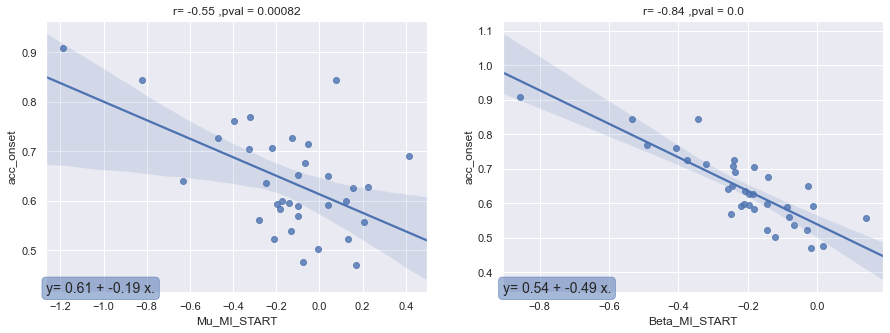

In [73]:
import seaborn as sns; 
import scipy
from scipy.stats import linregress
sns.set(color_codes=True)
band_type_list = df_mean_GA.columns[1::]

fig = plt.figure(figsize=(15,5))
for iBand,band_type in enumerate(band_type_list):
    print(band_type)
    ax = fig.add_subplot(121+iBand)
    X = df_mean_GA[band_type].to_numpy()
    y = acc_onset
    slope, intercept, r_value, p_value, stderr = linregress(X, y)
    print(r_value,p_value)
    bandpower_dict = {band_type:X,'acc_onset':acc_onset}
    bandpower_frame = pd.DataFrame.from_dict(bandpower_dict)
    
    g = sns.regplot(x=band_type, y="acc_onset",data=bandpower_frame,fit_reg=True)
    props = dict(boxstyle='round', alpha=0.5,color=sns.color_palette()[0])
    textstr = 'y= {} + {} x.'.format(np.round(intercept,2),np.round(slope,2))
    g.text(0.0, 0.0, textstr, transform=g.transAxes, fontsize=14, bbox=props)
    textstr = 'r= {} ,pval = {}'.format(np.round(r_value,2),np.round(p_value,5))
    plt.title(textstr)

# Mediation Analysis

In [90]:
df_mean_GA['RR_changes']= diff_on
df_mean_GA['acc_onset']=acc_onset
df_mean_GA.head()

Subject  Mu_MI_START  Beta_MI_START  RR_changes  acc_onset
0      0.0     0.208126       0.140581  198.450646   0.537500
1      1.0    -0.195319      -0.220139  193.888218   0.567157
2      2.0    -0.472306      -0.376431  172.513341   0.676961
3      3.0     0.226703      -0.184461  198.237071   0.620098
4      4.0     0.040590      -0.246124  183.049298   0.653431

In [91]:
from pingouin import mediation_analysis, read_dataset
df = read_dataset('mediation')
mediation_analysis(data=df_mean_GA, x='RR_changes', m=['Mu_MI_START','Beta_MI_START'], y='acc_onset', alpha=0.05,
                    n_boot=1000,seed=42)

path      coef        se      pval  CI[2.5%]  CI[97.5%]  \
0         Mu_MI_START ~ X  0.007347  0.003446  0.040750  0.000329   0.014366   
1       Beta_MI_START ~ X  0.004296  0.002042  0.043310  0.000137   0.008456   
2         Y ~ Mu_MI_START -0.007307  0.037188  0.845517 -0.083152   0.068539   
3       Y ~ Beta_MI_START -0.381004  0.062857  0.000001 -0.509202  -0.252807   
4                   Total -0.002052  0.000970  0.042204 -0.004027  -0.000077   
5                  Direct -0.000426  0.000663  0.525556 -0.001779   0.000927   
6    Indirect Mu_MI_START -0.000020  0.000490  0.958000 -0.001049   0.001024   
7  Indirect Beta_MI_START -0.001606  0.000954  0.050000 -0.003644   0.000168   

   sig  
0  Yes  
1  Yes  
2   No  
3  Yes  
4  Yes  
5   No  
6   No  
7   No

# Saving Variable

In [69]:
path  = os.path.join(folder_selected,'GA','test_mediation3_JASP.csv')
print(path)
df_mean_GA.to_csv(path)

D:\results\Results_ANS\subjectFolderExperiment\GA\test_mediation3_JASP.csv
